w:0.0002189053349928273, b:1.8e-05
loss is 0.6924676527816093
w:0.006916561832870537, b:0.000653482296396821
loss is 0.6787426635539685
w:0.010212653453991494, b:0.0011839473442077889
loss is 0.6768669050215407
w:0.011026459032939537, b:0.0016486170344535798
loss is 0.6768503982791855
w:0.011361264520131304, b:0.002179835735764556
loss is 0.6768685300266861
w:0.00952979705056845, b:0.002587254813921699
loss is 0.6768513643238401
w:0.009951545256003487, b:0.003094875075346143
loss is 0.6767162865976498
w:0.011661557353893464, b:0.0035420171794450935
loss is 0.6768379782458597
w:0.01032496349336112, b:0.0039889513773371885
loss is 0.6765994598294526
w:0.011298293861248978, b:0.0045032488206860994
loss is 0.6766529136227004
w:0.012136504028337464, b:0.0049544497117559975
loss is 0.6769105872290025
w:0.01063549680815173, b:0.005357054377188756
loss is 0.6764788157418851
w:0.009632250332435654, b:0.005758763542871399
loss is 0.6765193768348364
w:0.009134616983241348, b:0.006220509863200505


w:0.009354039445890604, b:0.05959085582833211
loss is 0.6716714022938441
w:0.010978772947848782, b:0.060029312595320454
loss is 0.6720652009212554
w:0.008912837973420575, b:0.060423618222062485
loss is 0.6716086979314428
w:0.007338629809621126, b:0.0608641793102319
loss is 0.6720420576644157
w:0.007890931564304551, b:0.061329584439681124
loss is 0.6717526124214487
w:0.007836518558309908, b:0.06178316977848971
loss is 0.6717302436240133
w:0.009567831287267816, b:0.06227396312441872
loss is 0.6714627304378392
w:0.009477970161868948, b:0.06264618095769925
loss is 0.6714225158771754
w:0.01057064360117825, b:0.06307889803149606
loss is 0.6716543675354144
w:0.009721832084961265, b:0.06351720421359497
loss is 0.6713819551571016
w:0.009134999090500135, b:0.06393185490151865
loss is 0.6712976815632707
w:0.008740161905099854, b:0.06435937994994805
loss is 0.6712803762821831
w:0.008328824423402815, b:0.06473243712739173
loss is 0.6713133015100553
w:0.008359442368148942, b:0.06516724523444438
loss

w:0.009807193284134935, b:0.10828113595253268
loss is 0.6680063073258434
w:0.008876225267570693, b:0.1086513713495439
loss is 0.6676677844887283
w:0.008421824060158876, b:0.1090865561496775
loss is 0.6675679331522559
w:0.007350638736630799, b:0.10949948488900806
loss is 0.6676042248296025
w:0.0076095842314934875, b:0.10992129918710163
loss is 0.6675226824330788
w:0.006990104716497795, b:0.11026216171413708
loss is 0.6676338419072012
w:0.008956902749310472, b:0.1107243543489186
loss is 0.6675294967844491
w:0.00804833543821482, b:0.11117726149847697
loss is 0.6673874327538172
w:0.007130736690827945, b:0.11155655059921696
loss is 0.6674809390655209
w:0.007548809023157847, b:0.11195268738738053
loss is 0.6673618263575724
w:0.00915360180764795, b:0.1123853972132258
loss is 0.6674603364112619
w:0.008980428451802394, b:0.11277926145191257
loss is 0.6673820258646156
w:0.0070904831783096724, b:0.11317111245405126
loss is 0.6673527851572071
w:0.008277325557738625, b:0.11361210973757822
loss is 0

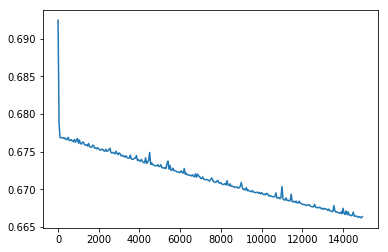

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))
def inference(w, b, x):        # inference, test, predict, same thing. Run model after training
    z = w * x + b
    pred_y=sigmoid(z)
    return pred_y

def eval_loss(w, b, x_list, gt_y_list):
    avg_loss = 0.5 * (w * x_list + b - gt_y_list) ** 2    # loss function
    avg_loss=gt_y_list*np.log(sigmoid(w*x_list+b))+(1-gt_y_list)*np.log(1-sigmoid(w*x_list+b))
    avg_loss =-np.sum(avg_loss)/x_list.shape[1]
    return avg_loss

def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw, db

def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b, lr):
    batch_size = batch_x_list.shape[1]
    #print(bat)
    avg_dw=0
    avg_db=0
    pred_y = inference(w, b, batch_x_list)	# get label data
    dw, db = gradient(pred_y, batch_gt_y_list, batch_x_list)
    avg_dw =np.sum(dw)
    avg_db += np.sum(db)
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w, b

def train(x_list, gt_y_list, batch_size, lr, max_iter):
    w = 0
    b = 0
    index=[]
    loss_index=[]
    num_samples = x_list.shape[1]
    for i in range(max_iter):
        batch_idxs = np.random.choice(x_list.shape[1], batch_size)
        batch_x =np.array([ [x_list[0][j] for j in batch_idxs]])
        batch_y = np.array([[gt_y_list[0][j] for j in batch_idxs]])
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        loss=eval_loss(w, b, x_list, gt_y_list)
        if i%50==0:   
            index.append(i)
            loss_index.append(loss)
            print('w:{0}, b:{1}'.format(w, b))
            print('loss is {0}'.format(loss))
    index=np.array(index)
    loss_index=np.array(loss_index)
    plt.plot(index,loss_index)

def gen_sample_data():
    w = random.randint(0, 10) + random.random()		# for noise random.random[0, 1)
    b = random.randint(0, 5) + random.random()
    num_samples = 100
    x_list = np.zeros((1,num_samples))
    y_list = np.zeros((1,num_samples))
    for i in range(num_samples):
        x = random.randint(0, 100) * random.random()
        x_list[0][i]=x
        y = w * x + b+ random.random() * random.randint(-1, 1)
        if y>=w*x+b:
            y_list[0][i]=1
        else:
            y_list[0][i]=0
        
    return x_list, y_list, w, b

def run():
    x_list, y_list, w, b = gen_sample_data()
    lr = 0.0001
    max_iter = 15000
    train(x_list, y_list, 50, lr, max_iter)

if __name__ == '__main__':	# 跑.py的时候，跑main下面的；被导入当模块时，main下面不跑，其他当函数调
    run()